# <center>Assignment 1</center>

There are 2 main parts asked in this assignment - Tensorflow Basics and Neural Networks. You can choose to code in Python2 or Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [0]:
from __future__ import print_function,division
%matplotlib inline
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np

## Tensorflow - Basics

### I. Linear Regression

<b>1a. Creating Sample Data </b>

In [0]:
x = np.random.randn(100,3) # 100 data points of dimension 3
w = np.array([[1],[2],[3]])
b = 10
y = np.matmul(x,w)+b

**1b. Plot Data**

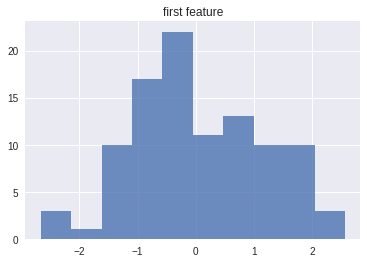

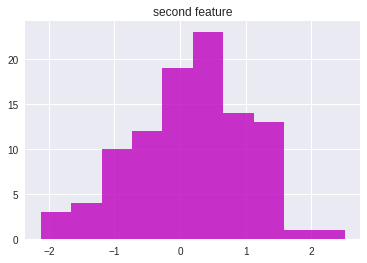

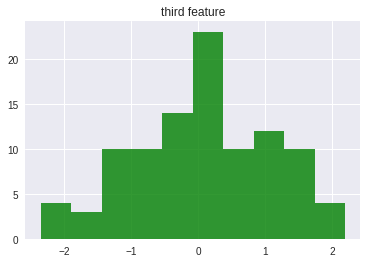

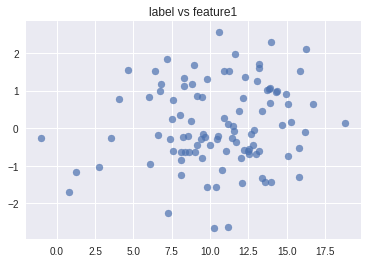

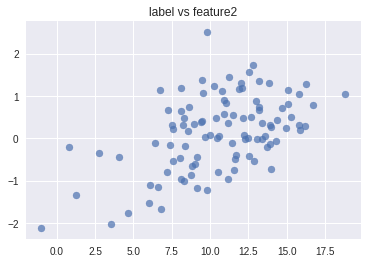

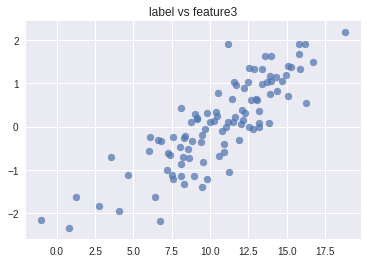

In [78]:
# Explore the data by plotting whatever makes you understand the problem better. 
# plots
plt.hist(x[:,0], alpha=0.8)
plt.title("first feature")
plt.show()
plt.hist(x[:,1], alpha=0.8, color="m")
plt.title("second feature")
plt.show()
plt.hist(x[:,2], alpha=0.8, color="g")
plt.title("third feature")
plt.show()
plt.scatter(y, x[:,0], alpha=0.7)
plt.title("label vs feature1")
plt.show()
plt.scatter(y, x[:,1], alpha=0.7)
plt.title("label vs feature2")
plt.show()
plt.scatter(y, x[:,2], alpha=0.7)
plt.title("label vs feature3")
plt.show()

<b>2. Creating Placeholders</b>

In [0]:
X = tf.placeholder(dtype=tf.float32,shape=[None,3]) 
Y_Expected = tf.placeholder(dtype=tf.float32, shape=[None, 1])

<b>3. Creating Variables</b>

In [0]:
b = tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=(1,1)),name="b")
W = tf.Variable(dtype=tf.float32, initial_value=np.zeros(shape=(1,3)), name="W")

<b> 4. Creating Compute Graph </b>

In [0]:
Y = tf.matmul(X,tf.transpose(W))+b
cost = tf.square(Y-Y_Expected, name=None)

<b> 5. Training and optimizer </b>

In [7]:
# This part has been done for you already! Just run it after you finish coding the above sections. 
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train_op = optimizer.minimize(cost)
for epoch in range(30):
    epoch_cost,_ = sess.run([cost,train_op],feed_dict={X:x,Y_Expected:y})
    print (epoch,epoch_cost)

0 [[ 83.31212  ]
 [165.68845  ]
 [  0.6788265]
 [ 36.457993 ]
 [ 45.676884 ]
 [ 69.58624  ]
 [169.58366  ]
 [124.523544 ]
 [ 73.84669  ]
 [ 46.640785 ]
 [148.40515  ]
 [ 91.02279  ]
 [179.00356  ]
 [133.4541   ]
 [185.16104  ]
 [150.0745   ]
 [179.09505  ]
 [ 56.26817  ]
 [ 12.691014 ]
 [249.8885   ]
 [ 93.49149  ]
 [ 76.491104 ]
 [ 37.259953 ]
 [150.75157  ]
 [195.93896  ]
 [163.48509  ]
 [ 89.23537  ]
 [ 99.863174 ]
 [119.27096  ]
 [  7.5573907]
 [ 96.104935 ]
 [124.439125 ]
 [ 67.76328  ]
 [262.48242  ]
 [112.45066  ]
 [ 95.51995  ]
 [126.55772  ]
 [ 16.486856 ]
 [203.84695  ]
 [157.52065  ]
 [173.50055  ]
 [ 68.49396  ]
 [ 65.893394 ]
 [104.95295  ]
 [135.70355  ]
 [227.5055   ]
 [ 69.25687  ]
 [110.50772  ]
 [215.92172  ]
 [ 78.1467   ]
 [ 65.57591  ]
 [  1.050384 ]
 [131.68283  ]
 [234.51135  ]
 [160.65582  ]
 [ 83.551094 ]
 [227.14565  ]
 [205.81386  ]
 [170.87802  ]
 [ 79.75354  ]
 [ 52.280064 ]
 [ 89.663025 ]
 [ 81.206604 ]
 [ 57.220394 ]
 [130.65576  ]
 [ 52.054928 ]
 [157.51

<b> 5. Print out parameters </b>

In [8]:
# Replace the None with the correct operation. You should get W close to [[1],[2],[3]] and b close to 10. 
print("W:",sess.run(W))
print("b:",sess.run(b))

W: [[1. 2. 3.]]
b: [[10.]]


### II. Matrix Multiplication

In [0]:
def ndmatmul():
    """
      # 3d x 2d Matmul operation. 
      You may find some of these functions useful: einsum, tile, expand_dims.
      :return a: Placeholder for 3d tensor [float64]
              b: Placeholder for 2d tensor [float64]
              c: Matrix Product
      """
    a = tf.placeholder(dtype=tf.float64, shape=[None, None, None])
    b = tf.placeholder(dtype=tf.float64, shape=[None, None])
    c = tf.tensordot(a, b, 1)
    return a,b,c

In [0]:
A,B,C = ndmatmul()

In [55]:
np.random.seed(1)
a = np.random.randn(5,2,3)
b = np.random.randn(3,1)
c = np.matmul(a,b)
print(a.shape)
print(b.shape)
print(c.shape)
print(c)
c.shape

(5, 2, 3)
(3, 1)
(5, 2, 1)
[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]


(5, 2, 1)

In [56]:

sess = tf.InteractiveSession()
c_tensor = sess.run(C,feed_dict={A:a,
                            B:b})
print(c_tensor)
if (c_tensor-c<10**-10).all():
    print("Correct!")

[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]
Correct!


### III. Experiments with Feed-forward NN on MNIST

In this Qn, you will experiment with Feed-forward Neural nets while training on the MNIST dataset. Read more about it <a href = "https://en.wikipedia.org/wiki/MNIST_database">here</a>. A random sample of the images has been shown to you. 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


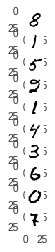

In [57]:
# Load MNIST Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
print(train_data.shape)
print(train_labels.shape)
print(eval_data.shape)
print(eval_labels.shape)
# Randomly choose 10 images from first 50 images of Train Data.
for index,idx in enumerate(random.sample(range(50),10)): 
    plt.subplot(10,1,index+1)
    plt.imshow(train_data[idx].reshape(28,28))

Fill in the following snippet as per the instructions. 
* For initialising placeholders, use None to accommodate variable batch_size. 
* Do not change the seed; use it for comparing epoch-wise loss with your friends.
* You can use the following <a href ="https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners">tutorial</a> for reference. Note that they use softmax in their example, while you are required to code Feedforward neural network. 


In [0]:
nodes_in = 784
nodes_out = 10
n_hidden = None

def initializer_1(shape):
    # Do not change the seed. 
    np.random.seed(1)
    return np.random.randn(*shape)

def initializer_2(shape):
    # Do not change the seed.
    np.random.seed(1)
    return 0.01 * np.random.randn(*shape)
  
def compute_graph(X,w,b,act,nh):
    y = {
        "y1": act[0](tf.matmul(X, w['h0'])+b['b0'])
    }
    for i in range(1,nh):
      y["y%d"%(i+1)] = act[i](tf.matmul(y["y%d"%i], w['h%d'%i])+b['b%d'%i])
    return tf.matmul(y["y%d"%nh], w['wo'])+b['bo']
  

class MNIST_ANN:
    def __init__(self,hidden_units,activations,initializer, learning_rate=0.001):
        """
        Initialise the weights and build the compute graph. Use AdamOptimizer with default parameters.
        :param hidden_units - list of number of hidden units. 
               Eg: [10,20] => Layer 1 has 10 hidden units and Layer 2 has 20.
        :param activations - list of activations for each of the hidden layers.
               Eg: [tf.nn.sigmoid, tf.nn.tanh]
        :param intializer - the reference to the function used for intializing the weights
        """
        # Define the placeholders
        self.input = tf.placeholder(dtype=tf.float32, shape=[None, nodes_in])
        self.expected_output = tf.placeholder(dtype=tf.float32, shape=[None, nodes_out])
        
        # Initialise the weights and biases. Use zeros for the biases.
        weights ={
            'wo': tf.Variable(dtype=tf.float32, initial_value= initializer(shape=[hidden_units[-1], nodes_out]))
        }
        biases = {
            'bo': tf.Variable(dtype=tf.float32, initial_value=tf.zeros(shape=[nodes_out]))
        }
        
        n_hidden = len(hidden_units)
        
        # Loop here.
        for i in range(n_hidden):
          if i==0:
            weights["h%d"%i] = tf.Variable(dtype=tf.float32, initial_value= initializer(shape=[nodes_in, hidden_units[0]]))
          else:
            weights["h%d"%i] = tf.Variable(dtype=tf.float32, initial_value= initializer(shape=[hidden_units[i-1], hidden_units[i]]))
          biases["b%d"%i] = tf.Variable(dtype=tf.float32, initial_value=tf.zeros(shape=[hidden_units[i]]))
        
        # Build the graph for computing output
        self.output = compute_graph(self.input, weights, biases, activations, n_hidden)
        
        # Define the loss and accuracy here. (Refer Tutorial)
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.expected_output, logits=self.output))
        self.accuracy = tf.equal(tf.argmax(self.output, 1), tf.argmax(self.expected_output, 1))
        
        # Instantiate the optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train_op = optimizer.minimize(self.cost)
        self.session = tf.Session()
        
        # Initialize all variables
    
    def train(self,train_data,train_labels,eval_data,eval_labels,batch_size,epochs=100):
        """
        Training code.
        """
        sess = self.session
        sess.run(tf.global_variables_initializer())

        # Slice the data and labels into batches depending on the batch_size.
        batches = len(train_data)/batch_size
        
        for epoch in range(epochs):
            cost_epoch = 0
            offset = 0
            for batch in range(int(batches)):
                # Forward Propagate, compute cost and backpropagate.
                cost,_ = sess.run([self.cost,self.train_op],feed_dict={ self.input: train_data[offset:offset+batch_size],
                                                             self.expected_output: train_labels[offset:offset+batch_size]})
                offset += batch_size
                cost_epoch += cost
            if epoch%10 == 0:
                print("Train accuracy: {}".format(self.compute_accuracy(train_data,train_labels)))        
                print("Test accuracy: {}".format(self.compute_accuracy(eval_data,eval_labels)))
            print("Epoch {}: {}".format(epoch,cost_epoch))
        print("Train accuracy: {}".format(self.compute_accuracy(train_data,train_labels)))
        print("Test accuracy: {}".format(self.compute_accuracy(eval_data,eval_labels)))

    def compute_accuracy(self,data,labels):
        """
        Fill in code to compute accuracy
        """
        preds = self.accuracy
        accuracy = tf.reduce_mean(tf.cast(preds, tf.float32))
        return accuracy.eval(feed_dict={self.input: data, self.expected_output: labels}, session=self.session)
        
        pass

In [60]:
ann = MNIST_ANN([10],[tf.nn.sigmoid],initializer_1)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)

Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.8649483
Epoch 1: 3275.00305783
Epoch 2: 2590.16955168
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262


The expected output for the above snippet is
<pre>
Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.86486949
Epoch 1: 3275.00310887
Epoch 2: 2590.16959983
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262
</pre>
If you get any other output and you feel you are correct, you can proceed (However, I cannot think of any case where you can get a different output). 

### Answer the following questions by running code snippets. Unless asked explicitly (like in Q1 and Q4), you need to just show the system performance and need not comment.

**1. Use 1 hidden layer of 10 hidden units with sigmoid activation and batch_size=10 for this question. Observe the network performance for initializer_1 and initializer_2 and explain the behavior. Why does this happen? What is your guess for tanh and relu? Why?**

In [61]:
# Your code here.
ann = MNIST_ANN([10],[tf.nn.sigmoid],initializer_1)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)

print("\n\nUsing initializer_2")
ann = MNIST_ANN([10],[tf.nn.sigmoid],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)

Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.8649483
Epoch 1: 3275.00305783
Epoch 2: 2590.16955168
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262


Using initializer_2
Train accuracy: 0.888436377048
Test accuracy: 0.889999985695
Epoch 0: 4661.21876498
Epoch 1: 2012.70547899
Epoch 2: 1702.05737616
Train accuracy: 0.916145443916
Test accuracy: 0.911099970341


The model shows high accuracy while using the initializer_2 for initializing weights as compared to initializer_1. The initial cost is low while using initializer_2, which is descending at an equally faster rate. Both trainig accuracy and test accuracy have gone up showing better performance.

This rise in accuracy can be accounted to the  smaller values of  random weights initialization in the initializer_2. It is best to take initial values as much as close to zero because during the steps of minimization, a positive initialized weight will have to travel more if it is actually a negative weight and vice versa for a given learning rate. This distance will be less if the initial values are closer to zero. The algorithm will have to work less which will lead to faster minimization(or very close approximation) and better results.


**ReLU**  should show better results(if not similar) than sigmoid because in relu, the negative inputs are all converted to zero. Which will prevent the negative gradients to become very small (relu will treat them as zero), reducing the likelihood of vanishing gradients. while there is no such normalization in sigmoid, making it prone to vanishing gradients may leading to lowered performance. 


**tanh**, which can be thought of as a rescaling of sigmoid (both have asymptotes at their extremes), would show similar results as that shown by sigmoid. But, since tanh (having range [-1,1]) has its output centered around zero which is symmetrical in nature and sigmoid's output is asymmetrical (range [0,1]), this asymmetry may take activations to saturation(highly unlikely here due to less hidden layers). 




<b>2. Play around with different configurations of the system. Spend some time on <a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.52239&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false"> Tensorflow Playground </a> to get a feel. Just demonstrate the performance of the system and make observations. No need to make any comments. </b>

In [62]:
# Your code here.

print("\n\nUsing initializer_2")
ann = MNIST_ANN([10],[tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)



Using initializer_2
Train accuracy: 0.886363625526
Test accuracy: 0.887300014496
Epoch 0: 2797.41020327
Epoch 1: 1812.86548536
Epoch 2: 1694.94713
Train accuracy: 0.901472747326
Test accuracy: 0.898299992085


In [63]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([10],[tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.886363625526
Test accuracy: 0.887300014496
Epoch 0: 2797.41020327
Epoch 1: 1812.86548536
Epoch 2: 1694.94713
Epoch 3: 1626.60006073
Epoch 4: 1575.48755744
Train accuracy: 0.908090889454
Test accuracy: 0.903100013733


In [65]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([10],[tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.901745438576
Test accuracy: 0.898599982262
Epoch 0: 3125.41567938
Epoch 1: 1666.60267279
Epoch 2: 1505.20209847
Epoch 3: 1420.47343363
Epoch 4: 1361.89498448
Train accuracy: 0.926327288151
Test accuracy: 0.913500010967


In [66]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([10],[tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=20,epochs=5)



Using initializer_2
Train accuracy: 0.899290919304
Test accuracy: 0.89620000124
Epoch 0: 1853.65345185
Epoch 1: 903.299501244
Epoch 2: 795.129950408
Epoch 3: 742.91541212
Epoch 4: 708.2095167
Train accuracy: 0.926436364651
Test accuracy: 0.920000016689


In [67]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([100],[tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.951090931892
Test accuracy: 0.949999988079
Epoch 0: 1484.49453319
Epoch 1: 680.720408115
Epoch 2: 467.810386824
Epoch 3: 340.654701044
Epoch 4: 252.592153185
Train accuracy: 0.983127295971
Test accuracy: 0.969500005245


In [68]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([10, 20, 30],[tf.nn.tanh, tf.nn.tanh, tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.869563639164
Test accuracy: 0.870100021362
Epoch 0: 4524.24465053
Epoch 1: 1897.33469958
Epoch 2: 1574.92540364
Epoch 3: 1440.13276394
Epoch 4: 1353.29681666
Train accuracy: 0.926418185234
Test accuracy: 0.918500006199


In [69]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([200],[tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.952109098434
Test accuracy: 0.949299991131
Epoch 0: 1362.2637687
Epoch 1: 597.255095747
Epoch 2: 376.504087162
Epoch 3: 247.15235249
Epoch 4: 162.152133656
Train accuracy: 0.988309085369
Test accuracy: 0.971499979496


In [70]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([200],[tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.953236341476
Test accuracy: 0.952199995518
Epoch 0: 1314.18361552
Epoch 1: 547.107761267
Epoch 2: 355.340343136
Epoch 3: 246.11698929
Epoch 4: 178.616846379
Train accuracy: 0.978872716427
Test accuracy: 0.967700004578


In [71]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([200],[tf.nn.sigmoid],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.944836378098
Test accuracy: 0.942200005054
Epoch 0: 1794.73049319
Epoch 1: 771.887277213
Epoch 2: 509.642648115
Epoch 3: 357.842124202
Epoch 4: 256.041922296
Train accuracy: 0.984799981117
Test accuracy: 0.971400022507


In [72]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([200, 100],[tf.nn.relu, tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.938581824303
Test accuracy: 0.933799982071
Epoch 0: 1518.45107382
Epoch 1: 605.229225123
Epoch 2: 404.96667468
Epoch 3: 304.230153611
Epoch 4: 233.027711052
Train accuracy: 0.983090937138
Test accuracy: 0.970700025558


In [73]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([200],[tf.nn.tanh],initializer_2, learning_rate = 0.01)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.8166000247
Test accuracy: 0.816900014877
Epoch 0: 2588.20087786
Epoch 1: 2327.80503854
Epoch 2: 2169.4698503
Epoch 3: 2124.81913835
Epoch 4: 2115.92703845
Train accuracy: 0.885345458984
Test accuracy: 0.88330000639


In [74]:
print("\n\nUsing initializer_2")
ann = MNIST_ANN([200],[tf.nn.tanh],initializer_2, learning_rate = 0.001)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=5)



Using initializer_2
Train accuracy: 0.952109098434
Test accuracy: 0.949299991131
Epoch 0: 1362.2637687
Epoch 1: 597.255095747
Epoch 2: 376.504087162
Epoch 3: 247.15235249
Epoch 4: 162.152133656
Train accuracy: 0.988309085369
Test accuracy: 0.971499979496


<b>4. List the problems you faced while experimenting [Loss did not decrease, ran into NaNs, etc]. What conclusions did you make? </b>



1. While comparing the performance of the network using relu and tanh, initially the loss decreases rapidly on both of fthe activations but after some epochs the loss of relu starts to decrese with a slow rate.
2.  When increasing the learnign rate, the cost per epoch went high and the rate of its descend has also decresed. what I can conclude from this is that using high learnign rate results in bigger steps and we may miss the minima entirely and loss may not decrease as expected.
3. Increasing the number of hidden layers is not incresaing the accuracy by a large margin, only smal changes can be noted. this can be because the complexity of the problem is not that much that we use multiple hidden layers.

